In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [7]:
train_df=pd.read_csv(r"C:\Users\Aishwik\Documents\F_R\Malignant Comments Classifier Project\train.csv")

In [11]:
test_df=pd.read_csv(r"C:\Users\Aishwik\Documents\F_R\Malignant Comments Classifier Project\test.csv")

In [8]:
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


# EDA

In [13]:
train_df.shape

(159571, 8)

In [14]:
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [15]:
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [20]:
train_df.isnull().sum()

id              0
comment_text    0
dtype: int64

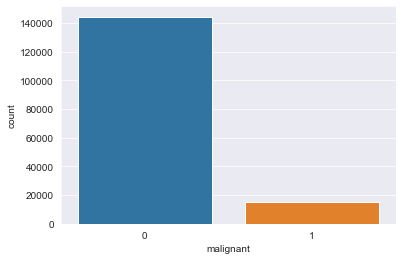

In [21]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(train_df['malignant'])

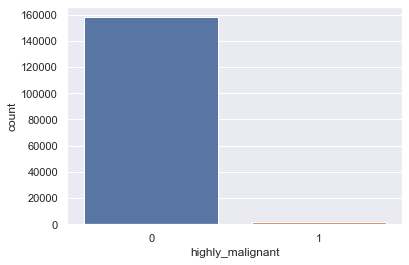

In [64]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(train_df['highly_malignant'])

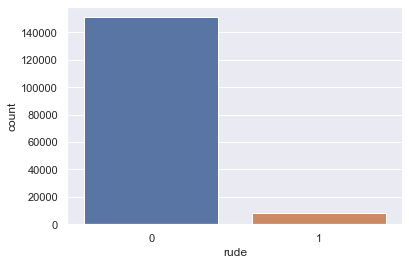

In [65]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(train_df['rude'])

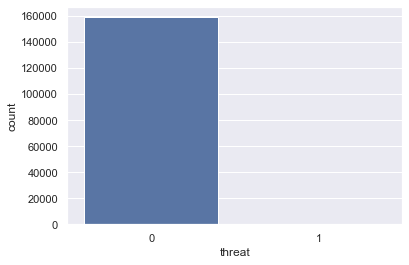

In [66]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(train_df['threat'])

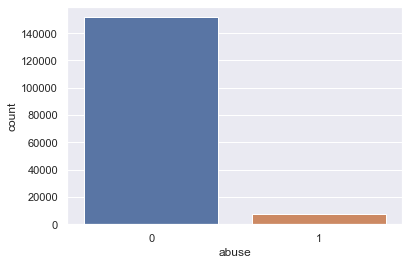

In [67]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(train_df['abuse'])

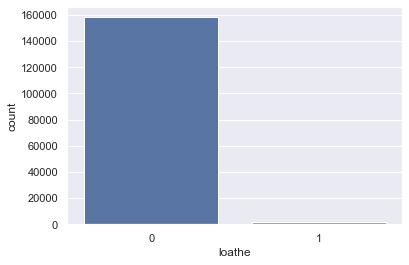

In [68]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(train_df['loathe'])

In [27]:
train_df.groupby('malignant').agg({'rude': ['min', 'max'], 'abuse': 'sum'})

rude     abuse
           min max   sum
malignant               
0            0   1   533
1            0   1  7344

In [32]:
train_df.groupby('malignant').agg('max')

,id,comment_text,highly_malignant,rude,threat,abuse,loathe
malignant,,,,,,,
0,ffffc2f890bb6fb5,﻿Sensual Pleasures of the MindItalic text\n\nT...,0,1,1,1,1
1,fffedeecd0364534,✋🏼 \n\nDrake Bell is transphobic trash and peo...,1,1,1,1,1


In [6]:
cols_target = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [9]:
unlabelled_in_all = train_df[(train_df['malignant']!=1) & (train_df['highly_malignant']!=1) & (train_df['rude']!=1) & 
                            (train_df['threat']!=1) & (train_df['abuse']!=1) & (train_df['loathe']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_df)*100)

Percentage of unlabelled comments is  89.83211235124176


In [10]:
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [13]:
no_comment = test_df[test_df['comment_text'].isnull()]
no_comment

,id,comment_text


In [14]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 153164
Total rows in train is 159571
malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64


In [15]:
# Let's look at the character length for the rows in the training data and record these
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))

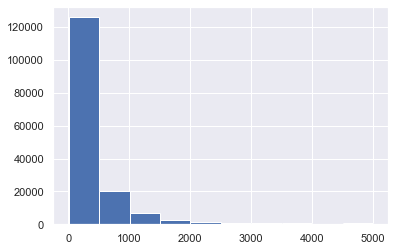

In [16]:
# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.show()

In [17]:
data = train_df[cols_target]

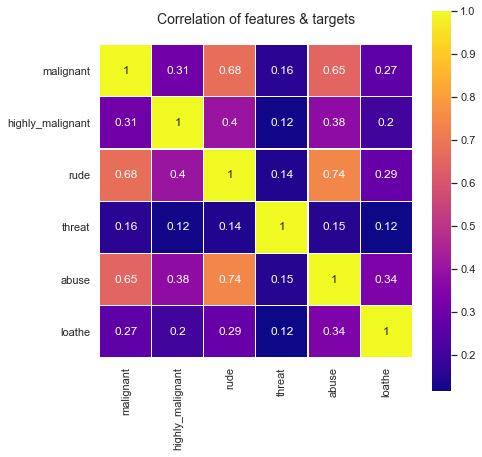

In [19]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [20]:
test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))

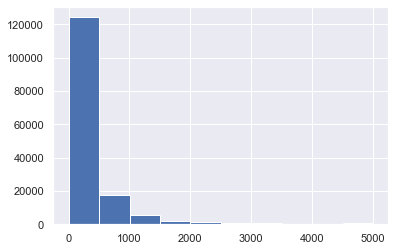

In [22]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()

# Data Cleaning

In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [24]:
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))

In [25]:
# clean the comment_text in test_df [Thanks, Pulkit Jha.]
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))

In [26]:
train_df = train_df.drop('char_length',axis=1)

In [27]:
X = train_df.comment_text
test_X = test_df.comment_text

In [28]:
print(X.shape, test_X.shape)

(159571,) (153164,)


# Vectorizing the data

In [29]:
# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [30]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178475 stored elements in Compressed Sparse Row format>

In [31]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2618950 stored elements in Compressed Sparse Row format>

# Binary Relevance - build a multi-label classifier using Logistic Regression

 This is probably the simplest which treats each label as a separate single classification problems. The key assumption here though, is that there are no correlation among the various labels.

In [43]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

#import os
#os.mkdir(r'C:\Users\Aishwik\Documents\F_R\sample_submission.csv')
# create submission file
submission_binary = pd.read_csv(r'C:\Users\Aishwik\Documents\F_R\Malignant Comments Classifier Project\sample_submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label] = test_y_prob

... Processing malignant


C:\Users\Aishwik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9639972175395278
... Processing highly_malignant


C:\Users\Aishwik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9921100951927355
... Processing rude


C:\Users\Aishwik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9832049683213115
... Processing threat
Training accuracy is 0.9981199591404453
... Processing abuse


C:\Users\Aishwik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9755406684171936
... Processing loathe
Training accuracy is 0.9939964028551553


C:\Users\Aishwik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
submission_binary.head()

,id,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,0.999962,0.462929,0.999965,0.050595,0.971350,0.431572
1,0000247867823ef7,0.002425,0.000437,0.000397,0.000326,0.003277,0.000417
2,00013b17ad220c46,0.011329,0.000115,0.003254,0.000035,0.007334,0.001264
3,00017563c3f7919a,0.001280,0.002102,0.000964,0.000117,0.000867,0.000031
4,00017695ad8997eb,0.018845,0.000794,0.001253,0.000600,0.003238,0.000550


In [46]:
# generate submission file
submission_binary.to_csv(r'C:\Users\Aishwik\Documents\F_R\Malignant Comments Classifier Project\submission_binary.csv',index=False)

# Classifier Chains - build a multi-label classifier using Logistic Regression

 In this method, the first classifier is trained on the input X. Then the subsequent classifiers are trained on the input X and all previous classifiers' predictions in the chain. This method attempts to draw the signals from the correlation among preceding target variables.

In [51]:
# create submission file
submission_chains = pd.read_csv(r'C:\Users\Aishwik\Documents\F_R\Malignant Comments Classifier Project\sample_submission.csv')

# create a function to add features
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [52]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm,y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    # make predictions from test_X
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label] = test_y_prob
    # chain current label to X_dtm
    X_dtm = add_feature(X_dtm, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    # chain current label predictions to test_X_dtm
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

... Processing malignant
Training Accuracy is 1.0
Shape of X_dtm is now (159571, 5007)
Shape of test_X_dtm is now (153164, 5007)
... Processing highly_malignant
Training Accuracy is 1.0
Shape of X_dtm is now (159571, 5008)
Shape of test_X_dtm is now (153164, 5008)
... Processing rude
Training Accuracy is 1.0
Shape of X_dtm is now (159571, 5009)
Shape of test_X_dtm is now (153164, 5009)
... Processing threat
Training Accuracy is 1.0
Shape of X_dtm is now (159571, 5010)
Shape of test_X_dtm is now (153164, 5010)
... Processing abuse
Training Accuracy is 1.0
Shape of X_dtm is now (159571, 5011)
Shape of test_X_dtm is now (153164, 5011)
... Processing loathe
Training Accuracy is 1.0
Shape of X_dtm is now (159571, 5012)
Shape of test_X_dtm is now (153164, 5012)


In [53]:
submission_chains.head()

,id,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,0.999991,2.171988e-04,0.999956,0.000091,0.999966,0.999523
1,0000247867823ef7,0.000011,9.722632e-07,0.000006,0.000004,0.000006,0.000005
2,00013b17ad220c46,0.000011,9.535863e-07,0.000006,0.000004,0.000006,0.000005
3,00017563c3f7919a,0.000010,9.541822e-07,0.000006,0.000004,0.000006,0.000004
4,00017695ad8997eb,0.000010,9.225417e-07,0.000006,0.000004,0.000006,0.000004


In [55]:
# generate submission file
submission_chains.to_csv(r'C:\Users\Aishwik\Documents\F_R\Malignant Comments Classifier Project\submission_chains.csv', index=False)

# Combined Result

In [58]:
# create submission file
submission_combined = pd.read_csv(r'C:\Users\Aishwik\Documents\F_R\Malignant Comments Classifier Project\sample_submission.csv')

In [59]:
for label in cols_target:
    submission_combined[label] = 0.5*(submission_chains[label]+submission_binary[label])

In [60]:
submission_combined.head()

,id,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,0.999977,0.231573,0.999961,0.025343,0.985658,0.715547
1,0000247867823ef7,0.001218,0.000219,0.000202,0.000165,0.001642,0.000211
2,00013b17ad220c46,0.005670,0.000058,0.001630,0.000019,0.003670,0.000634
3,00017563c3f7919a,0.000645,0.001052,0.000485,0.000061,0.000436,0.000018
4,00017695ad8997eb,0.009427,0.000398,0.000629,0.000302,0.001622,0.000277


In [63]:
# generate submission file
submission_combined.to_csv(r'C:\Users\Aishwik\Documents\F_R\Malignant Comments Classifier Project\final_submission.csv', index=False)